## Introduction

Upload 69tree.py, \*.ipynb and \*.png files to correcttly display this report

# Question 1

### 1a

In [1]:
STATES = ('H', 'S', 'T')

A = {
'H': {'H': 14/15, 'S': 1/50, 'T': 7/150},
'S': {'H': 1/20, 'S': 35/40, 'T': 3/40},
'T': {'H': 1/12, 'S': 1/12, 'T': 5/6},
}
for a in A:
    print('{}==>{}:{:<6f}, {}==>{}:{:<6f}, {}==>{}:{:<6f}'.format(a,'H', A[a]['H'],a,'S', A[a]['S'],a,'T', A[a]['T']))

H==>H:0.933333, H==>S:0.020000, H==>T:0.046667
S==>H:0.050000, S==>S:0.875000, S==>T:0.075000
T==>H:0.083333, T==>S:0.083333, T==>T:0.833333


HMM

<img src="fsm.png"/>

In [2]:
SYMBOLS = ('B', 'I', 'N')

E = {
'H': {'B': 0.3, 'I': 0.6, 'N': 0.1},
'S': {'B': 0.55, 'I': 0.15, 'N': 0.3},
'T': {'B': 0.1, 'I': 0.2, 'N': 0.7},
}
for e in E:
    print('{}==>{}:{:<3f}, {}==>{}:{:<3f}, {}==>{}:{:<3f}'.format(e,'B', E[e]['B'],e,'I', E[e]['I'],e,'N', E[e]['N']))

H==>B:0.300000, H==>I:0.600000, H==>N:0.100000
S==>B:0.550000, S==>I:0.150000, S==>N:0.300000
T==>B:0.100000, T==>I:0.200000, T==>N:0.700000


The emission probabilities for each state are given by the following table.

|       |**B**|**I**|**N**|
|:-----:|:---:|:---:|:---:|
| **H** | 0.3 | 0.6 | 0.1 |
| **S** | 0.55| 0.15| 0.3 |
| **T** | 0.1 | 0.2 | 0.7 |

### 1b

Simulate a sequence of length 150 under the HMM.

In [3]:
import numpy as np

def getProbability(k, Data):
    return [k[d] for d in Data]

def simulate_hmm(length = 1):
    states = []
    symbols = []
    for _ in range(length):
        try:
            states.append(np.random.choice(STATES, p=getProbability(A[states[-1]], STATES)))
        except IndexError:
            states.append(np.random.choice(STATES))
        symbols.append(np.random.choice(SYMBOLS, p=getProbability(E[states[-1]], SYMBOLS)))
    return states, symbols

states, symbols = simulate_hmm(150)
print(''.join(states[:100]))
print(''.join(symbols[:100]))
print()
print(''.join(states[100:]))
print(''.join(symbols[100:]))

SSSSSSTTHHHHHHHHHHHTTTTTTTTTTTTSSSSSSSSSTTTTSSSSSSSSSSSSSSSSTTTHHHHHHHHHHHHHHHHHHHHHHHSSSSSSHHHHHTTT
NBNNBBBNIIIIIIBBBNININNBINNNBININBBIBNNBBNINBBBBBBBBBBIBBBNBNINIBIIBIIBIBIIBNINIIINIBBBBBBIBNBNBBBNN

TTTTHHHHHHTHHHHHHHHHHTTTTTTTTHHHHSHHSSSSSSSSSSSSSS
NINIIBNIIBIBIBIIIBIBNNNNNNBNNIBBIBIIIINBBBBBNNBBII


### 1c

Then we calculate the natural logarithm of the joint probability $log (P (x,\pi))$ of this sequence.

We know $P(x,\pi) = P(x,\pi|\mathbf{e,a}) = a_{0 \pi_1} \prod_{i = 1}^L e_{\pi_i}(x_i)a_{\pi_i \pi_{i+1}}$

$$log(P(x,\pi)) = log(P(x,\pi|\mathbf{e,a})) = log(a_{0 \pi_1} \prod_{i = 1}^L e_{\pi_i}(x_i)a_{\pi_i \pi_{i+1}})$$

$$log(P(x,\pi)) = log(P(x,\pi|\mathbf{e,a})) = log(a_{0 \pi_1})+log( \prod_{i = 1}^L e_{\pi_i}(x_i)a_{\pi_i \pi_{i+1}})$$

$$log(P(x,\pi)) = log(P(x,\pi|\mathbf{e,a})) = log(a_{0 \pi_1})+\sum_{i = 1}^Llog(e_{\pi_i}(x_i))+\sum_{i = 1}^Llog(a_{\pi_i \pi_{i+1}})$$

In [4]:
def joint_logp(states, symbols):
    logp = np.log(1/3.0)    
    if len(states) > 0:
        for i in range(len(states)):
            logp += np.log(E[states[i]][symbols[i]])
            try:
                logp += np.log(A[states[i]][states[i+1]])
            except IndexError:
                pass
    print('logp: ' + str(logp))
    return logp
joint_logp(states, symbols)

logp: -214.076113413


-214.076113413294

$$log(P(x,\pi)) = log(P(x,\pi|\mathbf{e,a})) = log(a_{0 \pi_1} \prod_{i = 1}^L e_{\pi_i}(x_i)a_{\pi_i \pi_{i+1}})$$

In [5]:
def joint_logp2(states, symbols):
    val = 0    
    if len(states) > 0:
        val += 1/3.0
        for i in range(len(states)):
            try:
                val *= E[states[i]][symbols[i]] * A[states[i]][states[i+1]]
            except IndexError:
                val *= E[states[i]][symbols[i]] * A[states[i]][states[i]]
    print('logp: ' + str(np.log(val)))
    return np.log(val)
joint_logp2(states, symbols)

logp: -214.209644806


-214.20964480591851

Given $x, \pi$

$$x = B,I,N,B,N,I,N,B,N,I,N,B,I,N,B,I,I,N,B,B,N,B$$
$$\pi = S,S,H,H,H,T,T,S,S,S,H,H,H,H,H,H,S,S,S,S,S,S$$

In [6]:
pi = ['S','S','H','H','H','T','T','S','S','S','H','H','H','H','H','H','S','S','S','S','S','S']
x = ['B','I','N','B','N','I','N','B','N','I','N','B','I','N','B','I','I','N','B','B','N','B']
print(''.join(pi))
print(''.join(x))

SSHHHTTSSSHHHHHHSSSSSS
BINBNINBNINBINBIINBBNB


In [7]:
joint_logp(pi, x)

logp: -46.3877406945


-46.387740694504309

In [8]:
joint_logp2(pi, x)

logp: -46.5212720871


-46.521272087128857

### 1d

The log probability of the simulated symbols is given by the forward algorithm.

$$F_l(i) = \log \left[ e_l(x_i) \sum_k  f_k(i-1)a_{kl})\right]  = E_l(x_i) +  \log \left[\sum_k  f_k(i-1)a_{kl})\right]$$

$$P(x) = logsum_k (F_k(L))$$

$$log(P(x))=log(logsum_k (F_k(L)))$$

In [9]:
def logsum(x):
    return x[0] + np.log(np.sum(np.exp(x - x[0])))

def forward(x):
    logp = np.array([0.0] * len(STATES))
    if len(x) > 0:
        for i, st in enumerate(STATES):
            logp[i] = np.log(E[st][x[0]]) - np.log(len(STATES))
        for sy in x[1:]:
            prev = logp
            logp = np.array([0.0] * len(STATES))
            for i, st in enumerate(STATES):
                logp[i] = np.log(E[st][sy]) + logsum([prev[j] + np.log(A[k][st]) for j, k in enumerate(STATES)])
    return logsum(logp)

For $symbols$ defined as above, $\log{\left(P\left(symbols\right)\right)}$ is

In [10]:
print(forward(symbols))

-158.936746861


For $x$ defined as above, $\log{\left(P\left(x\right)\right)}$ is

In [11]:
print(forward(x))

-27.3105072553


In both of these examples, $P\left(x, \pi\right) \leq P\left(x\right)$. This is true in general because
$$P\left(x\right) = \sum_{\pi^\prime}{P\left(x, \pi^\prime\right)} = \sum_{\pi^\prime\neq\pi}{P\left(x, \pi^\prime\right)} + P\left(x, \pi\right) \geq P\left(x, \pi\right)$$

### 1e

We can use the log of the forward matrix $F$ to perform the first step of the stochastic traceback algorithm
$$P\left(\pi_L = k \mid x\right) = \frac{f_k\left(L\right)}{P\left(x\right)} = \exp{\left(F_k\left(L\right) - \log{\left(P\left(x\right)\right)}\right)}$$

# Question 2

### 2a

A method that simulates trees according to the Yule model with takes as input the number of leaves, $n$, and the branching parameter, $\lambda$.

The Yule model is a branching process that suggests a method of constructing trees with $n$ leaves. From each leaf, start a lineage going back in time. Each lineage coalesces with others at rate $\lambda$. When there $k$ lineages, the total rate
of coalescence in the tree is $k\lambda$. Thus, we can generate a Yule tree with $n$ leaves as follows:

In [12]:
from matplotlib import pyplot as plt
from tree69 import plot_tree
from tree69 import Tree
from tree69 import Node
%matplotlib inline


def randexp(lamda): # lambda is a keyword in Python
    return -1 * np.log(np.random.random()) / lamda

def random_ts(n, lamda):
    arrivalTime = []
    k=n
    t = 0.0
    while k > 1:
        t += randexp(lamda*k)
        arrivalTime.append(t)
        k -= 1
    arrivalTime.sort() # early => later
    return arrivalTime

To simulate a tree, we create a parent node with the next speciation time and assign it two children chosen uniformly at random from the available nodes. Then we remove these children from the available nodes and add the parent. We repeat this procedure $n-1$ times until there is only one available node, the root of the tree.

In [13]:
def simulateTree(lamda, k):
    nodes = []
    for i in map(str, range(1, k+1)):
        n = Node(i)
        n.set_height(0)
        nodes.append(n)    
    for t in random_ts(k, lamda):
        m = Node()
        i, j = np.random.choice(nodes, 2, replace=False)
        m.set_height(t)
        m.add_child(i)
        m.add_child(j)
        nodes.append(m)
        nodes.remove(i)
        nodes.remove(j)
    return Tree(nodes[0])

Simulate $1000$ trees with $\lambda = 0.5$ and $n = 10$ and compute their mean height.

In [14]:
np.mean([simulateTree(0.5, 10).get_root().get_height() for _ in range(1000)])

3.888527278256352

This statistic agrees with the theoretical mean $3.86$.

plot a tree with $\lambda = 0.5$ and $n = 10$.

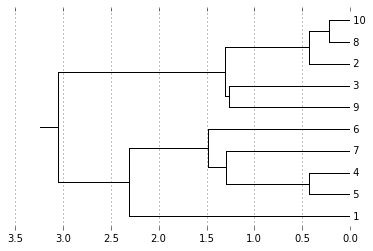

In [15]:
tree = simulateTree(0.5, 10)
plot_tree(tree)

### 2b

Next, simulate sequences down a simulated tree according to the Jukes-Cantor model.
The method takes a tree with $n$ leaves, sequence length $L$, and a mutation rate $\mu$. It should return either a matrix of sequences corresponding to nodes in the tree or the tree with sequences stored at the nodes.

In [16]:
BASES = ('A', 'C', 'G', 'T')
def randomSequence(length):
    return ''.join(np.random.choice(BASES, size=length))

The sequence at a non-root node simulated by mutating its parent node's sequence for the time given by the difference in their heights. Over time $t$ a nucleotide $x$ in a sequence $S$ mutates with rate $\mu$ to each of the other bases with probability
$$p_{x \neq y} = \frac{1}{4} - \frac{1}{4} \exp{\left(-\frac{4}{3} \mu t\right)}$$
or stays the same with probability
$$p_{x = y} = \frac{1}{4} + \frac{3}{4} \exp{\left(-\frac{4}{3} \mu t\right)}$$

In [17]:
def mutateSequence(S, mu, t):
    eq = 1/4 + 3/4 * np.exp(-4/3 * mu * t)
    neq = 1/4 - 1/4 * np.exp(-4/3 * mu * t)
    p = {x : [eq if y == x else neq for y in BASES] for x in BASES}
    return ''.join(np.random.choice(BASES, p=p[x]) for x in S)

def simulateSequences(node, mu, length=None):
    if length:
        node = node.get_root()
        node.set_sequence(randomSequence(length))
    if not node.is_root():
        parent = node.get_parent()
        t = parent.get_height() - node.get_height()
        S = mutateSequence(parent.get_sequence(), mu, t)
        node.set_sequence(S)
    if not node.is_leaf():
        for child in node.get_children():
            simulateSequences(child, mu)

Simulate a tree with $\lambda=0.5$ and $n = 10$ and $L=20$ and $\mu=0.5$.

In [18]:
simulateSequences(tree, 0.5, 20)

In [19]:
def getSequences(tree):
    return sorted(tree.get_leaves(), key=lambda l: int(l.get_label()))
sequences = getSequences(tree)

### 2c
Method to calculate the Jukes-Cantor distance matrix

In [20]:
for seq in sequences:
    print('{:<3}: {}'.format(seq.get_label(), seq.get_sequence()))

1  : GACGGATAAGGGAGCGTGGC
2  : ACATACGAGGATGTCCGGTG
3  : GAGCGGGTGCTACGGAGAGG
4  : GCAAGGTATATTACAAAGTA
5  : GATAACTTGGTGACAAAGTC
6  : GTGCCCAAGTCTGCCAAGGC
7  : CACGTGCCTGCTATGCACTC
8  : AGACACGAGGGTGTGCGGAG
9  : TTGTGATAAAGTACTGGGGT
10 : AGATACCAGGATGTGCGGAG


Jukes-Cantor distance for sequences x and y is defined by
$$d_{xy} = -\frac{3}{4} \log{\left(1 - \frac{4f_{xy}}{3}\right)}$$
where $f_{xy}$ is the fraction of differing sites between $x$ and $y$. Since we will be
dealing with short sequences, use the following definition of $f_{xy}$ so that the
distances are well-defined:
$$f_{xy} = \min{\left(\frac{D_{xy}}{L}, 0.75 - \frac{1}{L}\right)}$$
where $D_{xy}$ is the number of differing sites between $x$ and $y$ and $L$ is the length
of $x$.

In [21]:
def D(x, y):
    return sum(a != b for a, b in zip(x, y))

def f(x, y):
    L = len(x)
    return min(D(x,y) / L, 3/4 - 1/L)

def d(x, y):
    return - 3/4 * np.log(1 - 4/3 * f(x, y))

We can find the distance matrix for a set of sequences by computing $d_{xy}$ for all pairs $x$ and $y$.

In [22]:
def distanceMatrix(sequences):
    sequences = list(map(Node.get_sequence, sequences))
    return [[d(x, y) for y in sequences] for x in sequences]

Below is the distance matrix for our previously simulated sequences.

In [23]:
for row in distanceMatrix(sequences):
    print(' '.join(map('{:.3f}'.format, [x+0 for x in row])))

0.000 2.031 2.031 2.031 1.207 2.031 2.031 2.031 0.824 2.031
2.031 0.000 2.031 2.031 2.031 1.511 2.031 0.304 2.031 0.233
2.031 2.031 0.000 2.031 2.031 2.031 2.031 2.031 2.031 2.031
2.031 2.031 2.031 0.000 0.687 1.511 2.031 2.031 1.207 2.031
1.207 2.031 2.031 0.687 0.000 1.207 2.031 2.031 2.031 2.031
2.031 1.511 2.031 1.511 1.207 0.000 2.031 1.511 1.511 2.031
2.031 2.031 2.031 2.031 2.031 2.031 0.000 2.031 2.031 2.031
2.031 0.304 2.031 2.031 2.031 1.511 2.031 0.000 2.031 0.167
0.824 2.031 2.031 1.207 2.031 1.511 2.031 2.031 0.000 2.031
2.031 0.233 2.031 2.031 2.031 2.031 2.031 0.167 2.031 0.000


To compare the quality of UPGMA reconstruction of the previously simulated tree for simulated sequences of lengths $L \in \left\{20, 50, 200\right\}$ mutating with rate $\mu = 0.1$. First we create the distance matrices.

### 2d

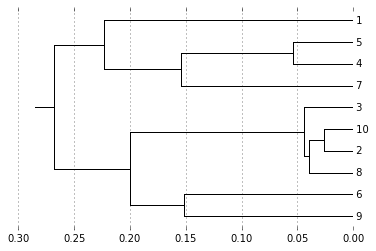

In [24]:
from tree69 import compute_upgma_tree

simulateSequences(tree, 0.1, 20)
plot_tree(compute_upgma_tree(distanceMatrix(getSequences(tree))))

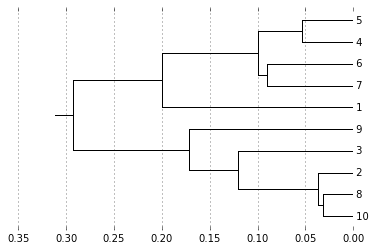

In [25]:
simulateSequences(tree, 0.1, 50)
plot_tree(compute_upgma_tree(distanceMatrix(getSequences(tree))))

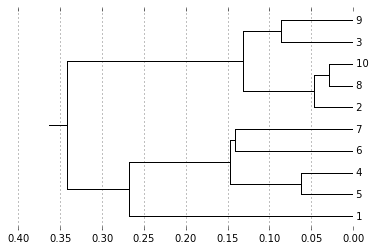

In [26]:
simulateSequences(tree, 0.1, 200)
plot_tree(compute_upgma_tree(distanceMatrix(getSequences(tree))))

### 2e

From the Reconstructed Tree Diagram. We could be sure that increasing length of sequence will increase the accuracy.